# Práctica 3

##### Autor: Pilar Navarro Ramírez

In [320]:
# Cargando el fichero version_information.py
# alojado el directorio de trabajo actual
# podremos comprobar las versiones concretas
# tanto del intérprete de Python, como de los
# módulos empleados.

%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 3.5.2 64bit [GCC 5.4.0 20160609]
IPython 7.4.0
OS Linux 4.15.0 99 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.16.3
matplotlib 3.0.3
sympy 1.5.1
Fri May 29 18:55:05 2020 CEST

## Ejercicios

**Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional.**

In [321]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp
import timeit      # Para estimar el tiempo de CPU empleado

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [322]:
#Calculamos la solución exacta de la ecuación diferencial x'(t)=x(t)
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 

def f(t,z):
    return z

y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
edo_sol = sp.dsolve(edo)
ics = {y(0): y0}
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
CI_sol = sp.solve(CI_eq)
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
sol_exacta


exp(t)

In [323]:
## Euler explícito
''' método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

def EulerExplicito(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)


## Euler implícito
''' método de Euler implicito para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def EulerImplicito(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    y1 = sp.Symbol('y1') # usaremos esta variable como incógnita
    for n in range(N):   # de la ecuación a resolver en cada iteración
        Y.append(sp.solve(Y[n]+h*F(X[n+1],y1)-y1,y1)[0])
    return np.array(X),np.array(Y)


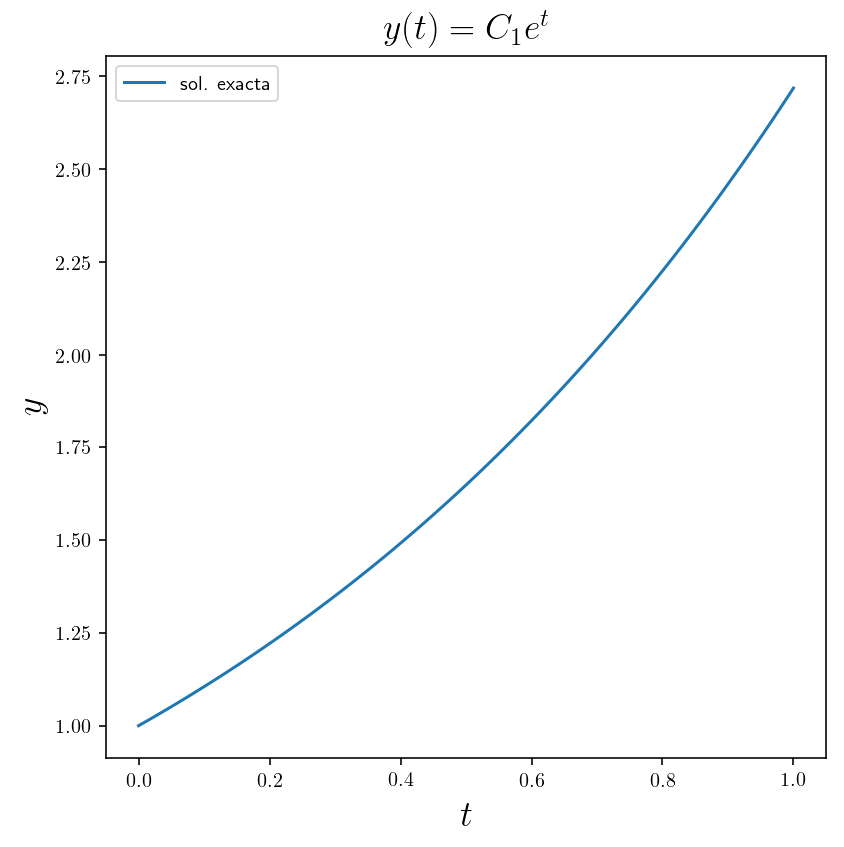

In [324]:
#Pintamos la solución exacta
y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(6, 6)) 
xx = np.linspace(a, b, 100)
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"$%s$" % sp.latex(edo_sol), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()
graf_exacta = fig

##### Aproximaciones usando Euler Explícito

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.9 µs
Para N=5 el error máximo es:  0.229961828459045


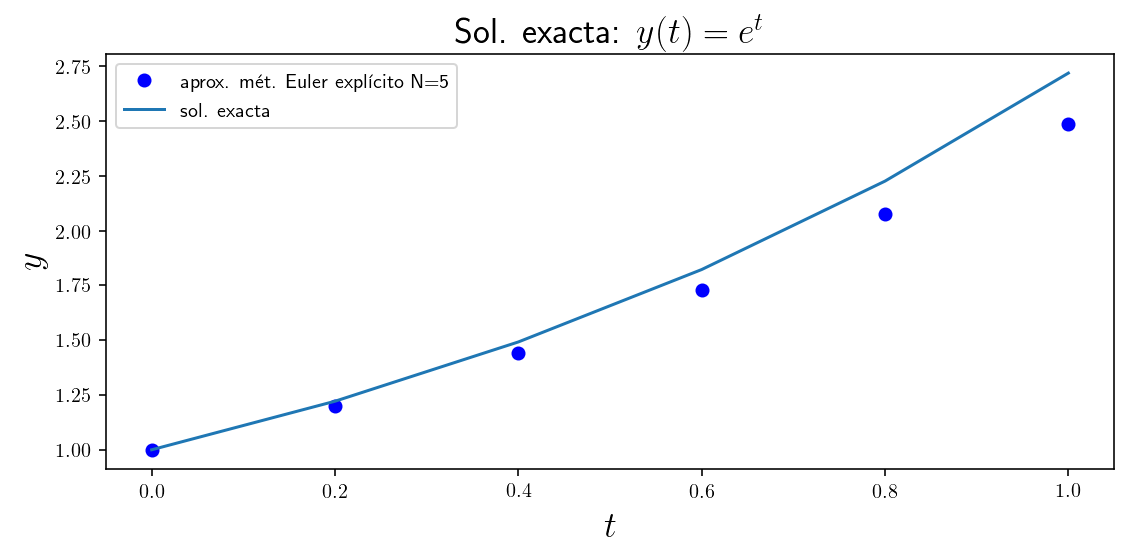

In [325]:
N=5
%time
xx, yEulerexpl = EulerExplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=5 el error máximo es: ", abs(valores_exactos - yEulerexpl).max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerexpl, 'bo', label = "aprox. mét. Euler explícito N=5")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Para N=50 el error máximo es:  0.0266937993854399


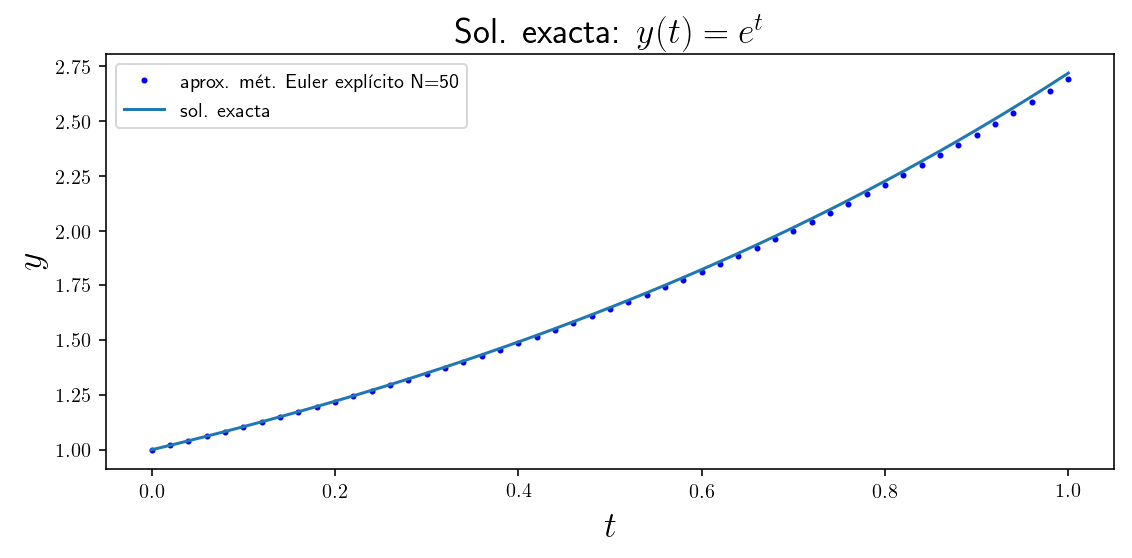

In [326]:
N=50
%time
xx, yEulerexpl1 = EulerExplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=50 el error máximo es: ", abs(valores_exactos - yEulerexpl1).max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerexpl1, 'bo',markersize=2,label = "aprox. mét. Euler explícito N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
Para N=150 el error máximo es:  0.00900591712416610


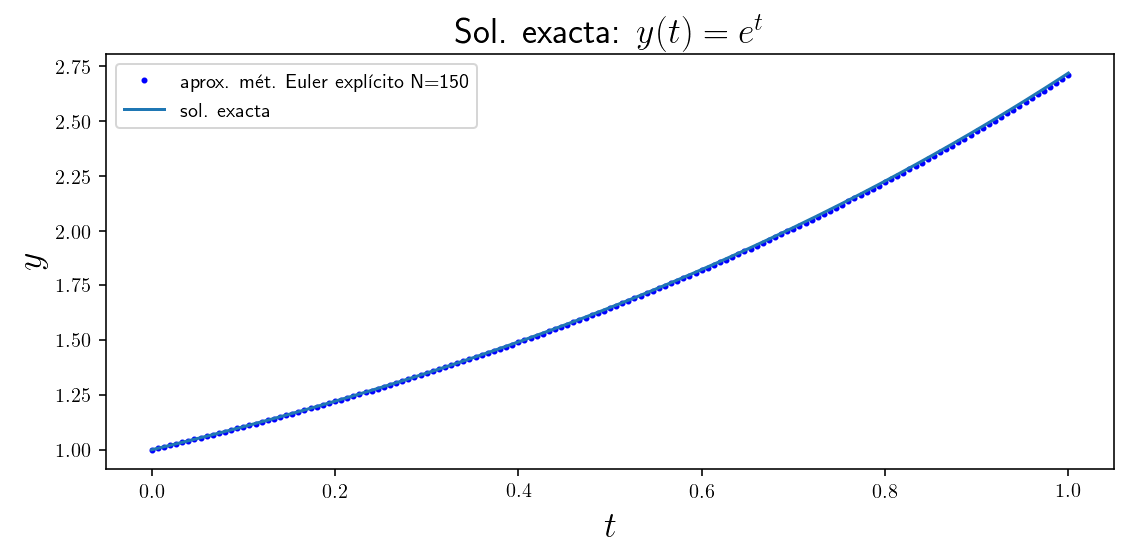

In [327]:
N=150
%time
xx, yEulerexpl2 = EulerExplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=150 el error máximo es: ", abs(valores_exactos - yEulerexpl2).max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerexpl2, 'bo',markersize=2,label = "aprox. mét. Euler explícito N=150")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

##### Aproximaciones usando Euler Implícito

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Para N=5 el error máximo es:  0.333475984040955


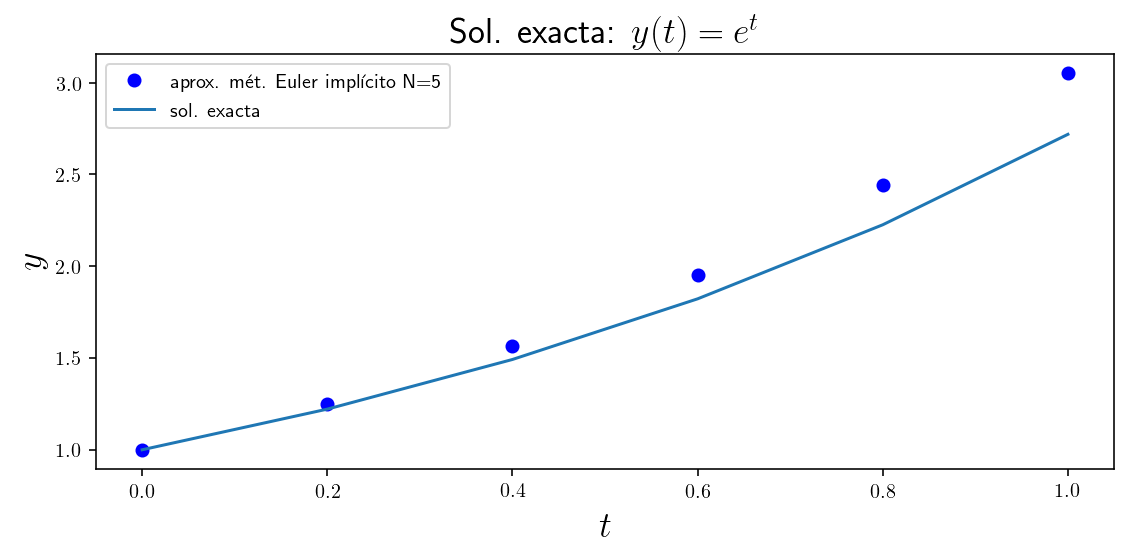

In [328]:
N=5
%time
xx, yEulerimpl = EulerImplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=5 el error máximo es: ", abs(valores_exactos - yEulerimpl).max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerimpl, 'bo', label = "aprox. mét. Euler implícito N=5")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Para N=50 el error máximo es:  0.0276908724005622


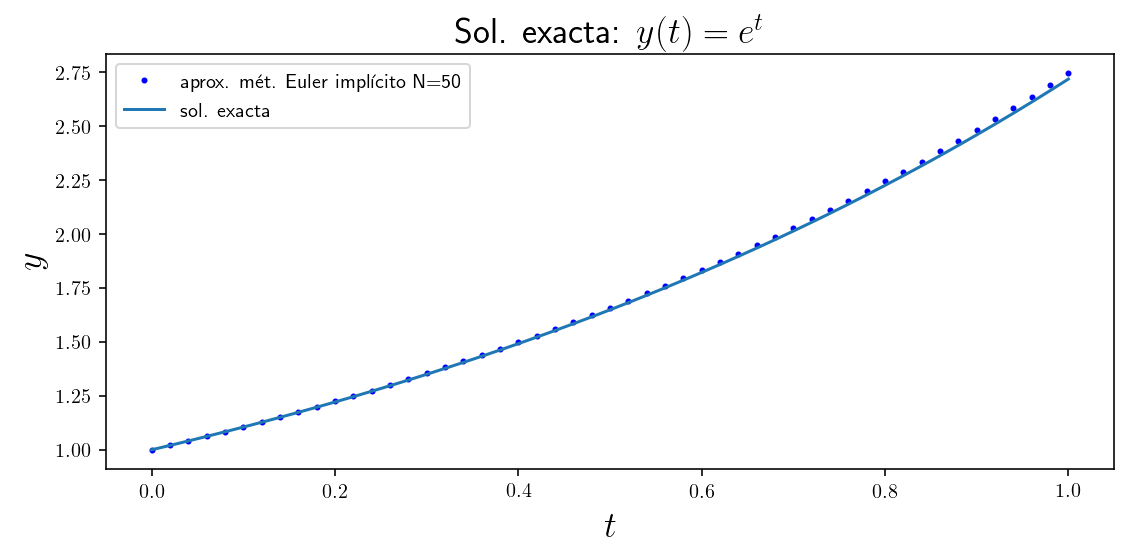

In [329]:
N=50
%time
xx, yEulerimpl1 = EulerImplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=50 el error máximo es: ", abs(valores_exactos - yEulerimpl1).max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerimpl1, 'bo', markersize=2, label = "aprox. mét. Euler implícito N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
Para N=150 el error máximo es:  0.00911666650171661


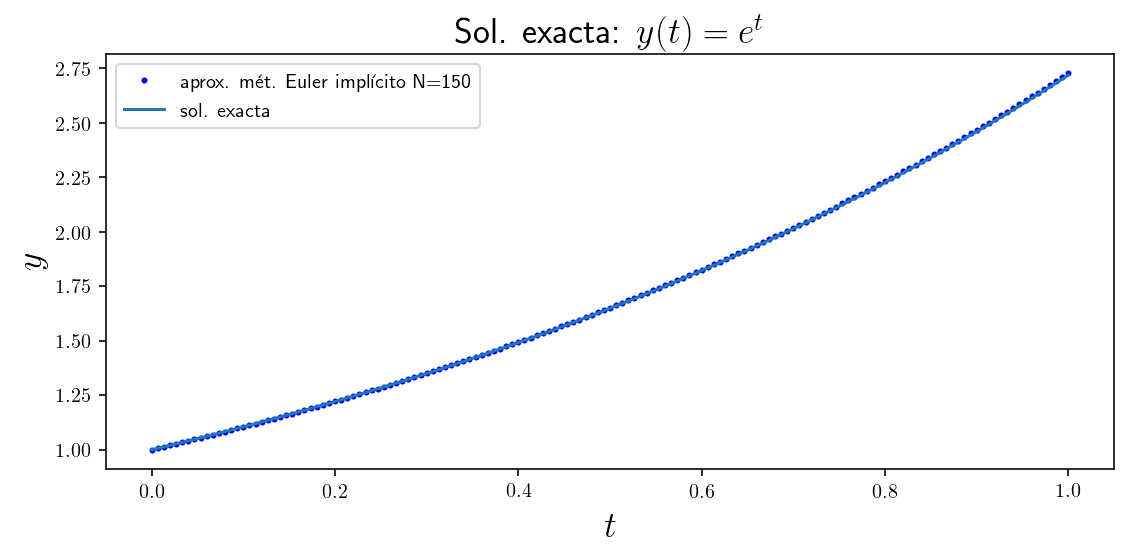

In [330]:
N=150
%time
xx, yEulerimpl2 = EulerImplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=150 el error máximo es: ", abs(valores_exactos - yEulerimpl2).max())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerimpl2, 'bo', markersize=2, label = "aprox. mét. Euler implícito N=150")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

#### Comparamos los resultados obtenidos

In [331]:
print("Diferencia entre usar N=50 y N=5 en euler explícito: ",abs(yEulerexpl2[50]-yEulerexpl[5]))
print("Diferencia entre usar N=150 y N=50 en euler explícito: ",abs(yEulerexpl2[150]-yEulerexpl1[50]))

print("Diferencia entre usar N=50 y N=5 en euler implícito: ",abs(yEulerimpl2[50]-yEulerimpl[5]))
print("Diferencia entre usar N=150 y N=50 en euler implícito: ",abs(yEulerimpl2[150]-yEulerimpl1[50]))

print("\nN=5")
print("Diferencia: ", abs(yEulerimpl[5]-yEulerexpl[5]))

print("N=50")
print("Diferencia: ", abs(yEulerimpl1[50]-yEulerexpl1[50]))

print("N=150")
print("Diferencia: ", abs(yEulerimpl2[150]-yEulerexpl2[150]))


Diferencia entre usar N=50 y N=5 en euler explícito:  1.09425054417818
Diferencia entre usar N=150 y N=50 en euler explícito:  0.017687882261273824
Diferencia entre usar N=50 y N=5 en euler implícito:  1.65458691085802
Diferencia entre usar N=150 y N=50 en euler implícito:  0.0185742058988456

N=5
Diferencia:  0.563437812500000
N=50
Diferencia:  0.0543846717860021
N=150
Diferencia:  0.0181225836258827


Observamos que conforme aumentamos el número de nodos (disminuimos el valor de h) el error cometido en las aproximaciones por ambos métodos disminuye, pues como sabemos ambos son convergentes, es decir, aumenta la precisión, siendo en el método de Euler implícito la diferencia entre el número de nodos algo más significativa que para el método de Euler explícito. 

Tanto el método de Euler implítico como explícito son estables (lo sabemos por la teoría), de modo que la estabilidad no cambia si modificamos en número de nodos, y tienen el mismo orden de precisión teórico (p=1), aunque los métodos implícitos suelen ser algo más exactos que los explícitos. Sin embargo, aquí observamos que el método implícito comete en todos los casos un error algo mayor que método explícito, siendo esta diferencia menos significativa conforme aumenta el número de nodos. 

En cuanto al coste computacional, cuanto más nodos tenemos mayor es este coste, pues hay que realizar las iteraciones un mayor número de veces. En el método implícito hay que resolver además una ecuación en cada iteración, lo que aumenta aún más el coste computacional, por lo que este es algo más costoso que el explícito.

Podemos concluir que para este caso es mejor usar el método de Euler explícito, pues es menos costoso y más exacto. Además, la diferencia entre usar 50 y 150 nodos es pequeña, con lo que, si no necesitamos mucha precisión en la aproximación, para disminuir el coste computacional, sería mejor usar 50 nodos.

**A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).**

In [332]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [333]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 
N=10

def f(t,z):
    return z

In [334]:
def EulerMejorado(F,x0,y0,xfinal,n):
    X = np.linspace(x0,xfinal,n+1)
    Y = [y0]; h = (xfinal-x0)/n    
    for i in range(n):
        Y.append(Y[i] + h*F(X[i]+h/2,Y[i]+h/2*f(X[i],Y[i])))
    return np.array(X),np.array(Y)

Euler mejorado:
 [1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


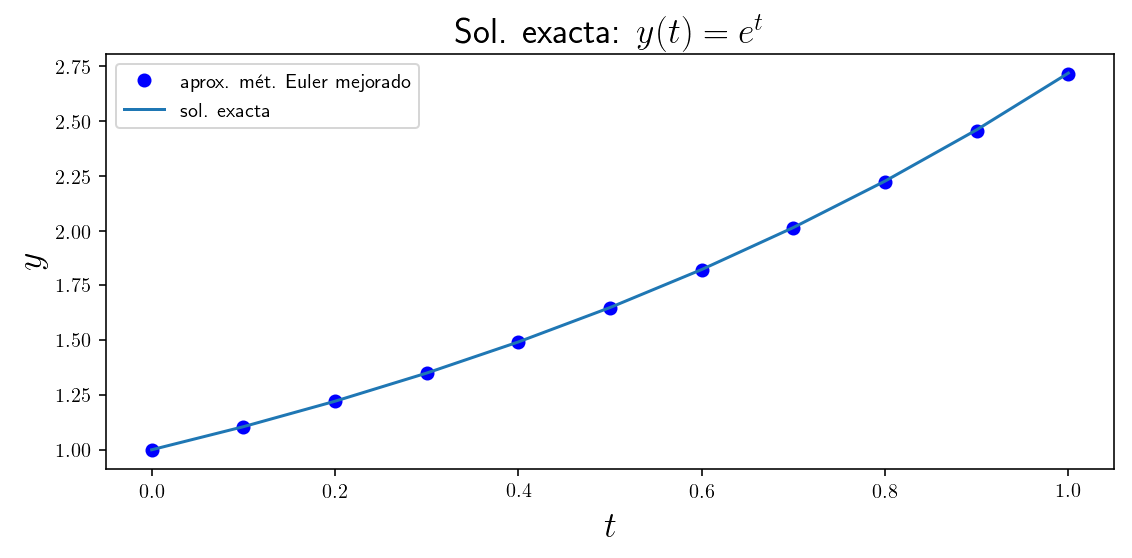

In [335]:
xx, yEulermej = EulerMejorado(f,a,ya,b,N)
print ("Euler mejorado:\n", yEulermej)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulermej, 'bo', label = "aprox. mét. Euler mejorado")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

In [336]:
def Heun(F,x0,y0,xfinal,n):
    X = np.linspace(x0,xfinal,n+1)
    Y = [y0]; h = (xfinal-x0)/n   
    for i in range(n):
        Y.append(Y[i] + (h/2)*( F(X[i],Y[i]) + F(X[i+1],Y[i]+h*F(X[i],Y[i])) ))
    return np.array(X),np.array(Y)

Heun:
 [1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


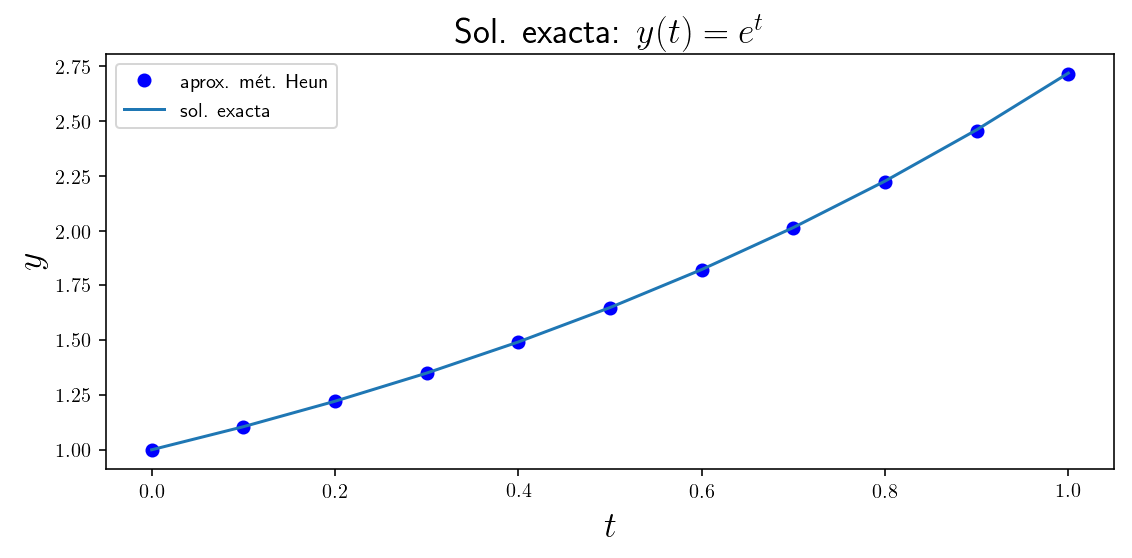

In [337]:
xx, heun = Heun(f,a,ya,b,N)
print ("Heun:\n", yEulermej)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,heun, 'bo', label = "aprox. mét. Heun")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

**Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.**

In [338]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [339]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 

def f(t,z):
    return z

In [340]:
## Taylor2
''' método del método de Taylor de orden 2 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def Taylor2(F,x0,y0,xfinal,N):  
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Para N=5 el error máximo es:
Taylor de orden 2:  0.0155736652590450
Euler explícito:  0.229961828459045
Euler implícito:  0.333475984040955
Euler mejorado:  0.0155736652590450
Heun:  0.0155736652590450


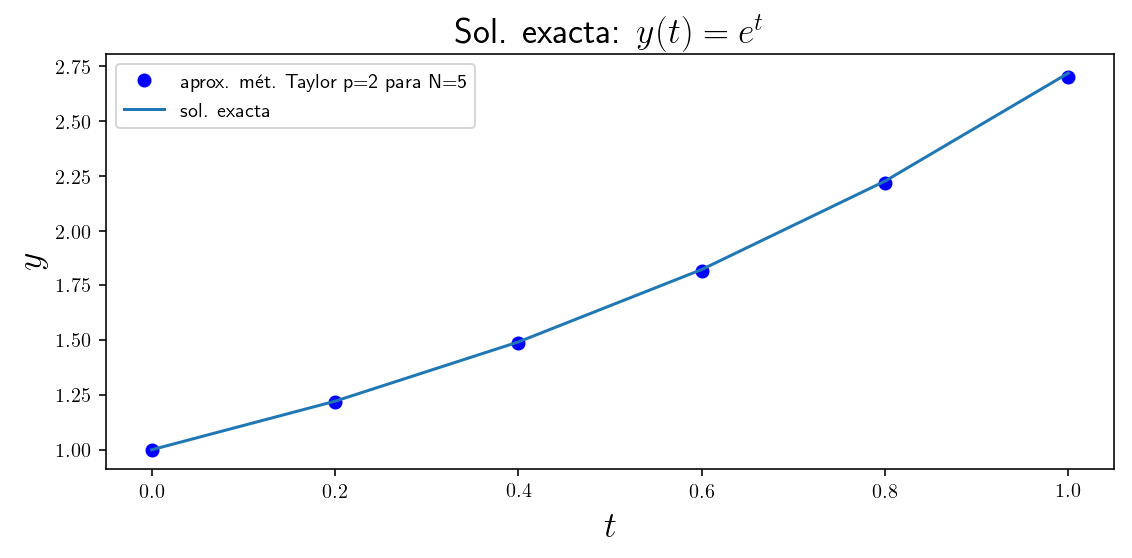

In [341]:
N=5
xx, yTaylor2 = Taylor2(f,a,ya,b,N)
xx, yEexpl = EulerExplicito(f,a,ya,b,N)
xx, yEimpl = EulerImplicito(f,a,ya,b,N)
xx, yEmej = EulerMejorado(f,a,ya,b,N)
xx, heun = Heun(f,a,ya,b,N)

valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=5 el error máximo es:\nTaylor de orden 2: ", abs(valores_exactos - yTaylor2).max())
print("Euler explícito: ", abs(valores_exactos - yEexpl).max())
print("Euler implícito: ", abs(valores_exactos - yEimpl).max())
print("Euler mejorado: ", abs(valores_exactos - yEmej).max())
print("Heun: ", abs(valores_exactos - heun).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yTaylor2, 'bo', label = "aprox. mét. Taylor p=2 para N=5")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Para N=50 el error máximo es:
Taylor de orden 2:  0.000178516387869365
Euler explícito:  0.0266937993854399
Euler implícito:  0.0276908724005622
Euler mejorado:  0.000178516387872030
Heun:  0.000178516387872030


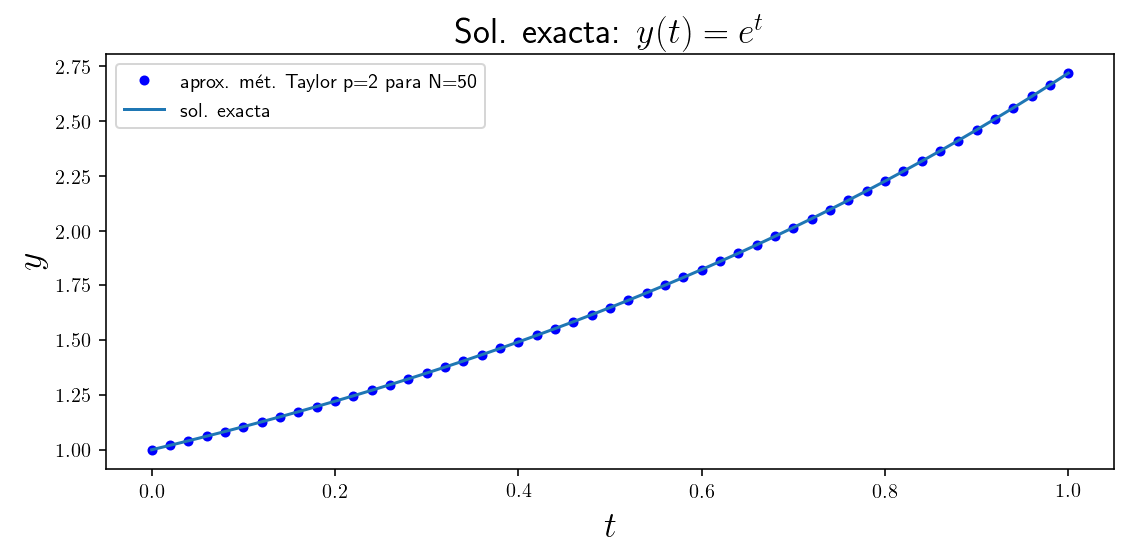

In [342]:
N=50
xx, yTaylor2 = Taylor2(f,a,ya,b,N)
xx, yEexpl = EulerExplicito(f,a,ya,b,N)
xx, yEimpl = EulerImplicito(f,a,ya,b,N)
xx, yEmej = EulerMejorado(f,a,ya,b,N)
xx, heun = Heun(f,a,ya,b,N)

valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=50 el error máximo es:\nTaylor de orden 2: ", abs(valores_exactos - yTaylor2).max())
print("Euler explícito: ", abs(valores_exactos - yEexpl).max())
print("Euler implícito: ", abs(valores_exactos - yEimpl).max())
print("Euler mejorado: ", abs(valores_exactos - yEmej).max())
print("Heun: ", abs(valores_exactos - heun).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yTaylor2_1, 'bo', markersize= 4, label = "aprox. mét. Taylor p=2 para N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Para N=150 el error máximo es:
Taylor de orden 2:  2.00349384846810e-5
Euler explícito:  0.00900591712416610
Euler implícito:  0.00911666650171661
Euler mejorado:  2.00349384802401e-5
Heun:  2.00349384802401e-5


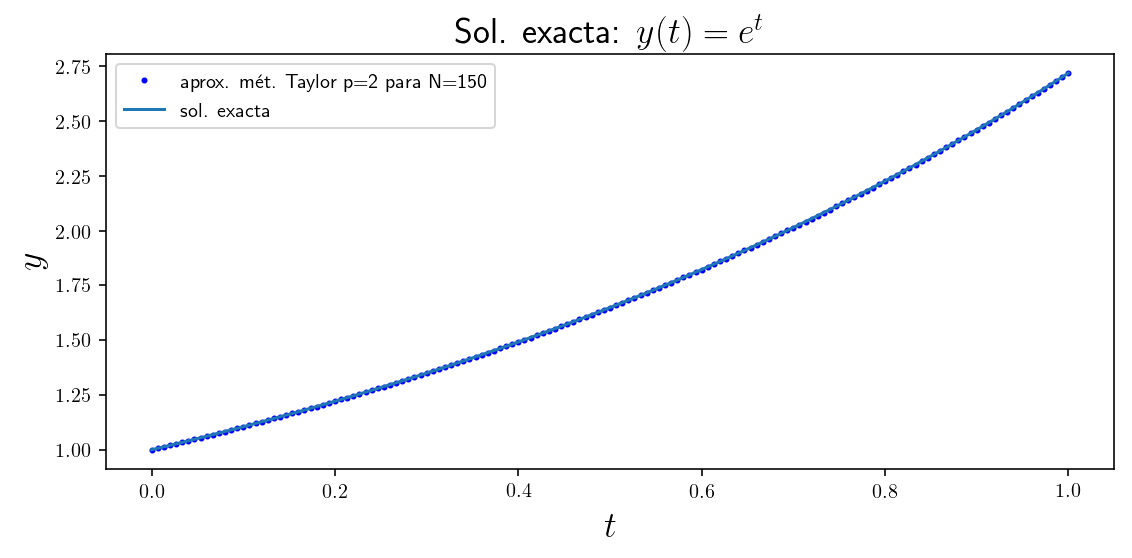

In [343]:
N=150
xx, yTaylor2 = Taylor2(f,a,ya,b,N)
xx, yEexpl = EulerExplicito(f,a,ya,b,N)
xx, yEimpl = EulerImplicito(f,a,ya,b,N)
xx, yEmej = EulerMejorado(f,a,ya,b,N)
xx, heun = Heun(f,a,ya,b,N)

valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=150 el error máximo es:\nTaylor de orden 2: ", abs(valores_exactos - yTaylor2).max())
print("Euler explícito: ", abs(valores_exactos - yEexpl).max())
print("Euler implícito: ", abs(valores_exactos - yEimpl).max())
print("Euler mejorado: ", abs(valores_exactos - yEmej).max())
print("Heun: ", abs(valores_exactos - heun).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yTaylor2_2, 'bo', markersize= 2, label = "aprox. mét. Taylor p=2 para N=150")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

In [344]:
print("Diferencia entre usar N=50 y N=5: ",abs(yTaylor2_2[50]-yTaylor2[5]))
print("Diferencia entre usar N=150 y N=50: ",abs(yTaylor2_2[150]-yTaylor2_1[50]))

Diferencia entre usar N=50 y N=5:  0.361714136813663
Diferencia entre usar N=150 y N=50:  0.000158481449384684


Podemos observar que tanto Euler mejorado como Heun y Taylor de orden 2 cometen el menor error, siendo la diferencia entre los errores cometidos por dichos métodos prácticamente insignificante. Por otro lado vemos que Euler explícito y Euler implícito comenten un error muy parecido. Esto verifica los ordenes de convergencia teóricos que tenemos para los distintos métodos, pues sabemos que Euler implícito y explícito tienen un orden de convergencia de p=1 y Euler mejorado, Heun y Taylor tienen orden p=2.

**A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$**

In [345]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [346]:
## Taylor de orden 3
''' método de Taylor de orden 3 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def Taylor3(F,x0,y0,xfinal,N):  
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)
   
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]})+(h**3)/6*F3(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

In [347]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 
N=15

def f(t,z):
    return z

Taylor de orden 3:
 [1 1.06893827160494 1.14262902850175 1.22139989881229 1.30560109677486
 1.39560697979203 1.49181771281868 1.59466104749003 1.70459422389972
 1.82210600348312 1.94771884204423 2.08199121258713 2.22552008827956
 2.37894359658762 2.54294385638201 2.71825001062938]


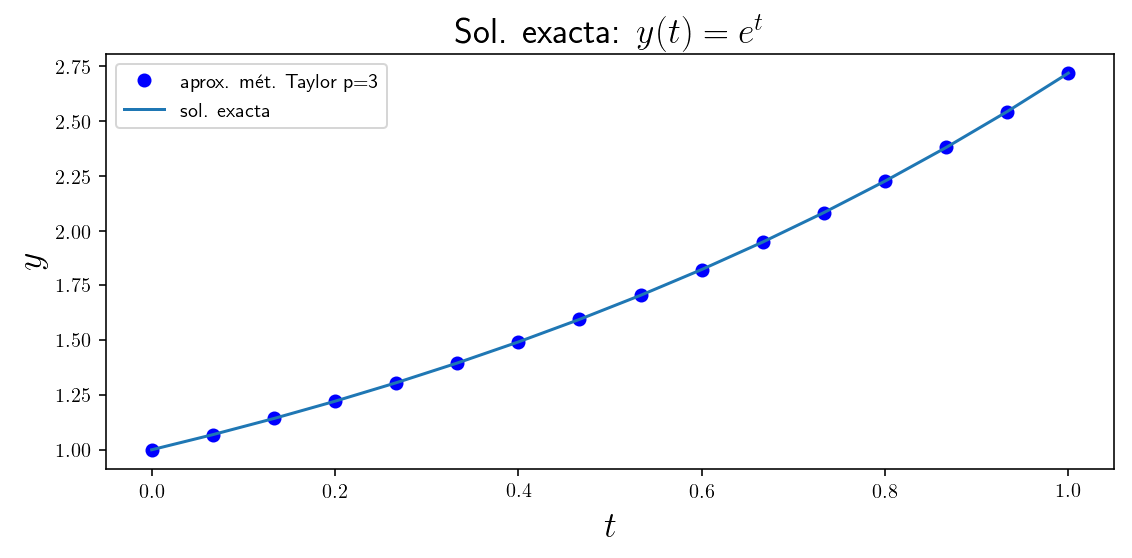

In [348]:
xx, ytaylor3 =Taylor3(f,a,ya,b,N)
print ("Taylor de orden 3:\n", ytaylor3)

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,ytaylor3, 'bo', label = "aprox. mét. Taylor p=3")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

In [349]:
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - ytaylor3).max())

Error:  3.18178296665472e-5


**Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional**

In [350]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp
import timeit      # Para estimar el tiempo de CPU empleado
# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [351]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 

def f(t,z):
    return z

In [352]:
## Método de Runge-Kutta clásico
''' Método de Runge-Kutta de cuarto orden para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,h).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def RKClasico(F,x0,y0,xfinal,N):
    
    def RK4(F,xn,yn,h):
        K1 = F(xn,yn)
        K2 = F(xn + h/2, yn + K1*h/2)
        K3 = F(xn + h/2, yn + K2*h/2)
        K4 = F(xn + h  , yn + K3*h)
        return (K1 + 2*K2 + 2*K3 + K4)/6    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK4(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Para N=5 el error máximo es:  3.06918531096656e-5


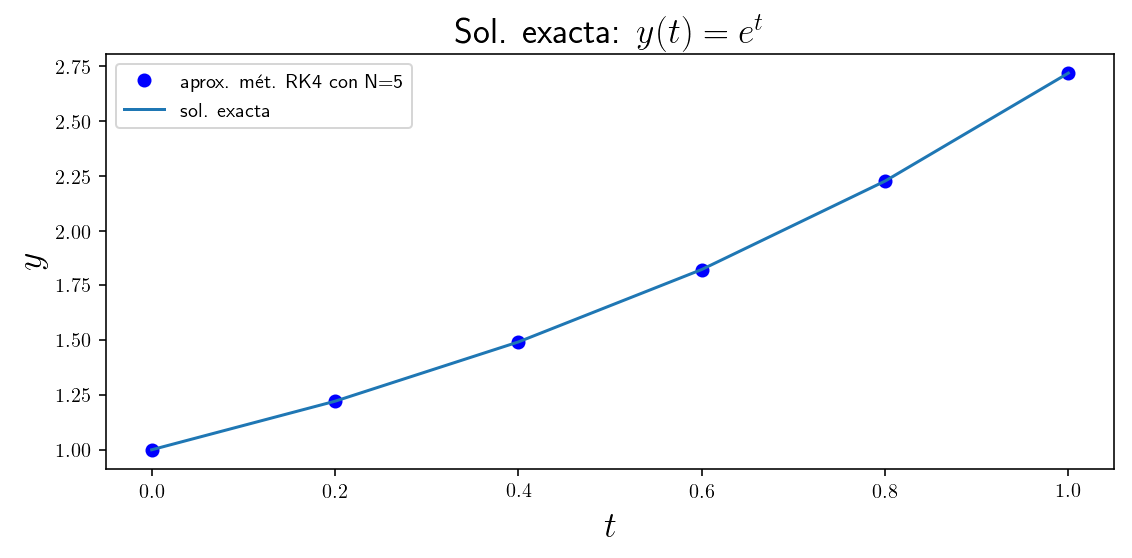

In [353]:
N=5
%time
xx, yRK4 = RKClasico(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=5 el error máximo es: ", abs(valores_exactos - yRK4).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yRK4, 'bo',label = "aprox. mét. RK4 con N=5")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Para N=50 el error máximo es:  3.56448515148600e-9


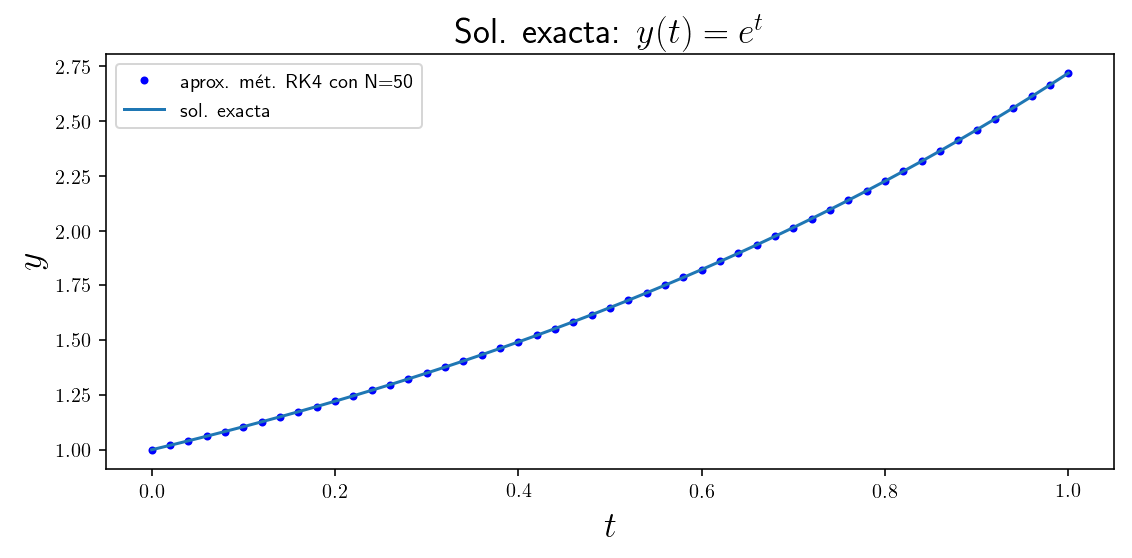

In [354]:
N=50
%time
xx, yRK4 = RKClasico(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=50 el error máximo es: ", abs(valores_exactos - yRK4).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yRK4, 'bo', markersize=3, label = "aprox. mét. RK4 con N=50")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Para N=150 el error máximo es:  4.44968506485566e-11


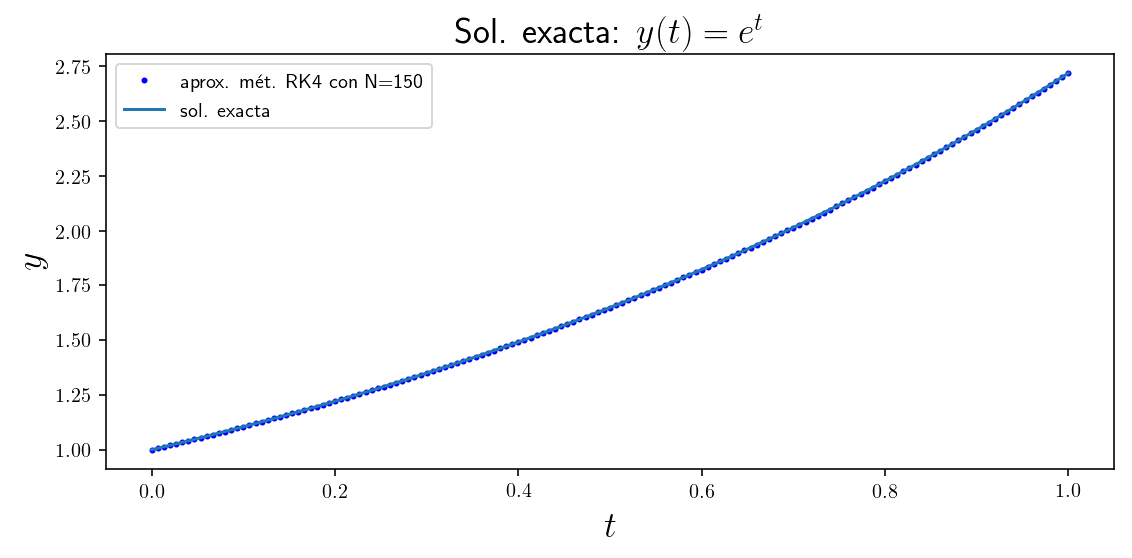

In [355]:
N=150
%time
xx, yRK4 = RKClasico(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Para N=150 el error máximo es: ", abs(valores_exactos - yRK4).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yRK4, 'bo', markersize=2, label = "aprox. mét. RK4 con N=150")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

El método de Runge-Kutta clásico es estable (lo sabemos por la teoría), de modo que la estabilidad no cambia si modificamos el número de nodos.

A medida que aumentamos el número de nodos (disminuimos el valor de h) el error cometido disminuye, es decir, aumenta la precisión, siendo este error prácticamenete nulo para un número de nodos de 150. Sabemos que el orden de convergencia teórico de este método es 4, siendo así teóricamente el más rápido de los métodos vistos hasta aquí. En efecto, podemos comprobar que el error cometido por este método es mucho menor que el cometido por los métodos anteriores para cualquier número de nodos. 
 
En cuanto al coste computacional, cuanto más nodos tenemos mayor es este coste, pues hay que realizar las iteraciones un mayor número de veces. La diferencia en coste computacional de este método con los anteriores se puede considerar inexistente.

Así pues podemos concluir que este es el mejor de los métodos vistos hasta ahora, pues es más preciso e igual de costoso. 

**A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.**

In [356]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [357]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 
N=50

def f(t,z):
    return z

In [358]:
#Uso un arreglo de Butcher que me he inventado con m=4 de forma que el método resultante es 
#diagonalmente implícito y consistente
def RKImplicito (F, x0, y0, xfinal, N):

    def RK4(F, xn, yn, h):
        K1_aux = sp.Symbol('K1_aux')
        K1  = sp.solve(F(xn + 1/2*h , yn + 1/2*h*K1_aux ) - K1_aux,K1_aux)[0]
        K2  = F(xn + h, yn + h*K1)
        K3  = F(xn + h, yn + h*(K1/2 + K2/2))
        K4  = F(xn + 2*h , yn + h*(K1/2 + 3*K2/2)) 
        return (2*K1 + K2 + 2*K3 + 2*K4)/7
    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    for n in range(N):
        Y.append(Y[n] + h*RK4(F,X[n],Y[n],h))

    return np.array(X),np.array(Y)

Error:  0.0352232794394061


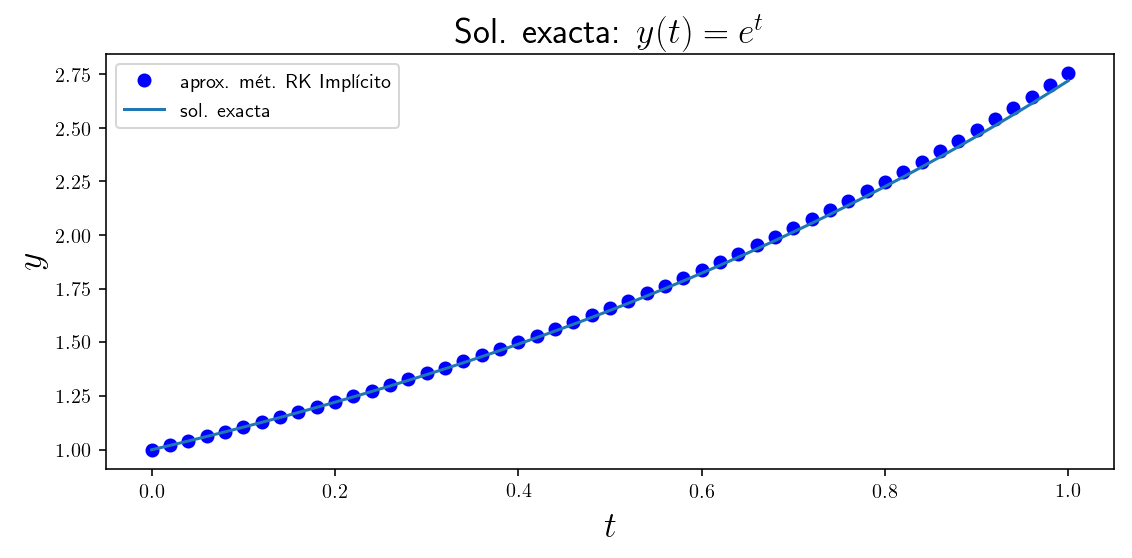

In [359]:
xx, yRKImpl = RKImplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - yRKImpl).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yRKImpl, 'bo', label = "aprox. mét. RK Implícito")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

In [360]:
#Uso un arreglo de Butcher que me he inventado con m=4 de forma que el método resultante es 
#explícito y consistente
def RKExplicito (F, x0, y0, xfinal, N):

    def RK4(F, xn, yn, h):
        K1  = F(xn,yn)
        K2  = F(xn + 1/2*h, yn + h*K1/2)
        K3  = F(xn + 2*h, yn + h*(K1 + K2))
        K4  = F(xn + 3*h , yn + h*(K1/2 + 3*K2/2 + K3)) 
        return (2*K1 + K2 + 2*K3 + 3*K4)/8
    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    for n in range(N):
        Y.append(Y[n] + h*RK4(F,X[n],Y[n],h))

    return np.array(X),np.array(Y)

Error:  0.0650904870617026


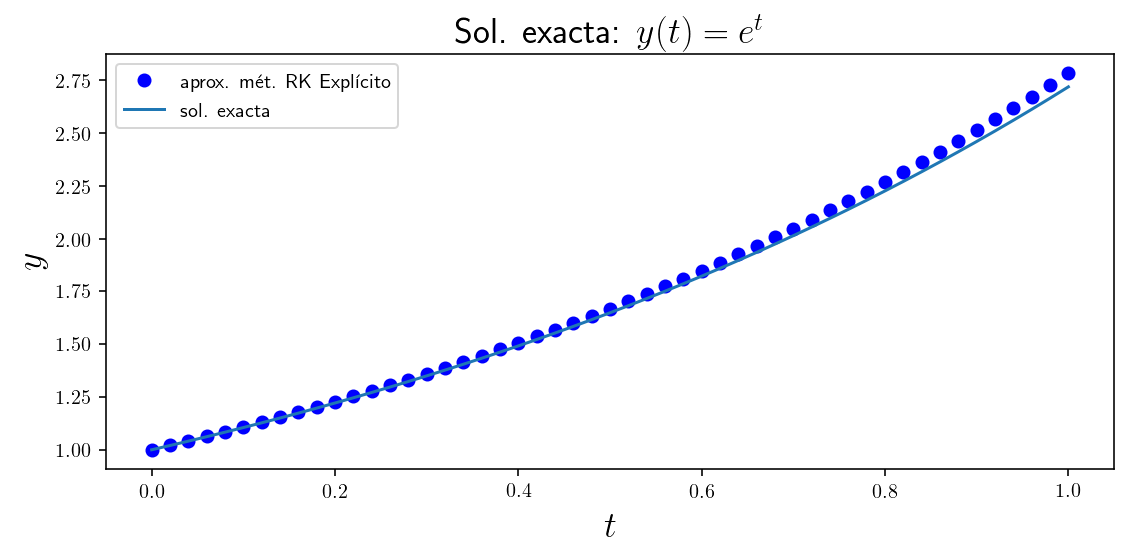

In [361]:
xx, yRKExpl = RKExplicito(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - yRKExpl).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yRKExpl, 'bo', label = "aprox. mét. RK Explícito")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

**A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.**

In [362]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [363]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 
N=50

def f(t,z):
    return z

In [364]:
## método de Adams-Bashforth con k=2
def AB_k2(F,x0,y0,xfinal,N):
    
    ''' Método de Adams-Bashforth (con k = 2) para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,N).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''
    def AB2(F,x0,y0,y1,h):
        return (3*F(x0+h,y1)-F(x0,y0))/2    
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)

## método de Adams-Bashforth con k=3
def AB_k3(F,x0,y0,xfinal,N):
    
    ''' Método de Adams-Bashforth (con k = 3) para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,N).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''

    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); y2 = y1 + (h/2)*(3*F(x0+h,y1)-F(x0,y0))
    Y = [y0,y1,y2]
    
    def AB3(F,x0,y0,y1,y2,h):
        return (5*F(x0,y0)-16*F(x0+h,y1)+23*F(x0+2*h,y2))/12    
    
    for n in range(N-2):
        Y.append(Y[n+2] + h*AB3(F,X[n],Y[n],Y[n+1],Y[n+2],h))
    
    return np.array(X),np.array(Y)
  
## método del trapecio        
def Trapecio(F,x0,y0,xfinal,N):
    ''' Método del trapecio para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,N).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''

    h = (xfinal-x0)/N
    def trap(F,x0,y0,h):
        y1 = sp.Symbol('y1')
        return sp.solve(y0 + h*(F(x0,y0) + F(x0+h,y1))/2 - y1,y1)[0]
    
    X = np.linspace(x0,xfinal,N+1)  
    Y = [y0]
    for n in range(N):
        Y.append(trap(F,X[n],Y[n],h))
        
    return np.array(X),np.array(Y)
        
## método de Simpson
def Simpson(F,x0,y0,xfinal,N):
    
    ''' Método de Simpson para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,N).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''
    
    h = (xfinal-x0)/N
    def simp(F,x0,y0,y1,h):
        y2 = sp.Symbol('y2')
        return sp.solve(y0 + h*(F(x0,y0) + 4*F(x0+h,y1) + F(x0+2*h,y2))/3 - y2,y2 )[0]
    
    X = np.linspace(x0,xfinal,N+1)
    y1 = y0 + h*F(x0,y0) 
    Y = [y0,y1]
    
    for n in range(N-1):
        Y.append(simp(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)
        
## Fórmula abierta de 4 pasos
              
def ForAbierta4(F,x0,y0,xfinal,N):
    ''' Fórmula abierta de 4 pasos para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''
    
    def forabierta(F,x0,y0,y1,y2,y3,h):
        return y0 + 4*h*(2*F(x0+h,y1) - F(x0+2*h,y2) +2*F(x0+3*h,y3) )/3      
   
    h = (xfinal-x0)/N    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    
    for n in range(3):
        Y.append(Y[n] + h*F(x0+n*h,Y[n]))
    
    for n in range(N-3):
        Y.append(forabierta(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],h))
    return np.array(X),np.array(Y)

Método de Adams-Bashforth con k=2 
Error:  0.000980006996357918


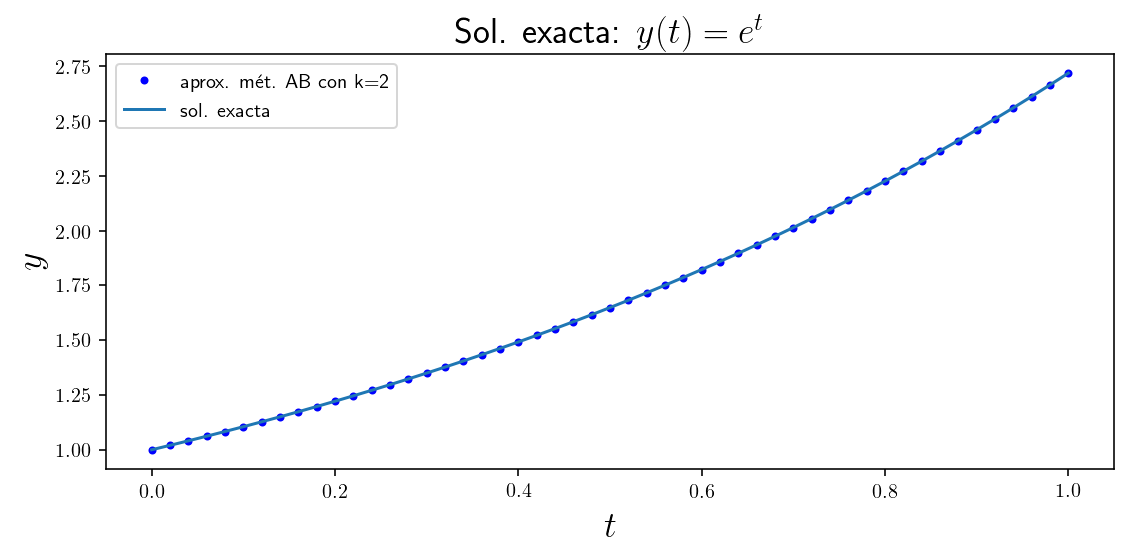

In [365]:
print("Método de Adams-Bashforth con k=2 ")
xx, yAB2 = AB_k2(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - yAB2).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yAB2,'bo',markersize=3, label = "aprox. mét. AB con k=2")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Método de Adams-Bashforth con k=3 
Error:  0.000554027437681182


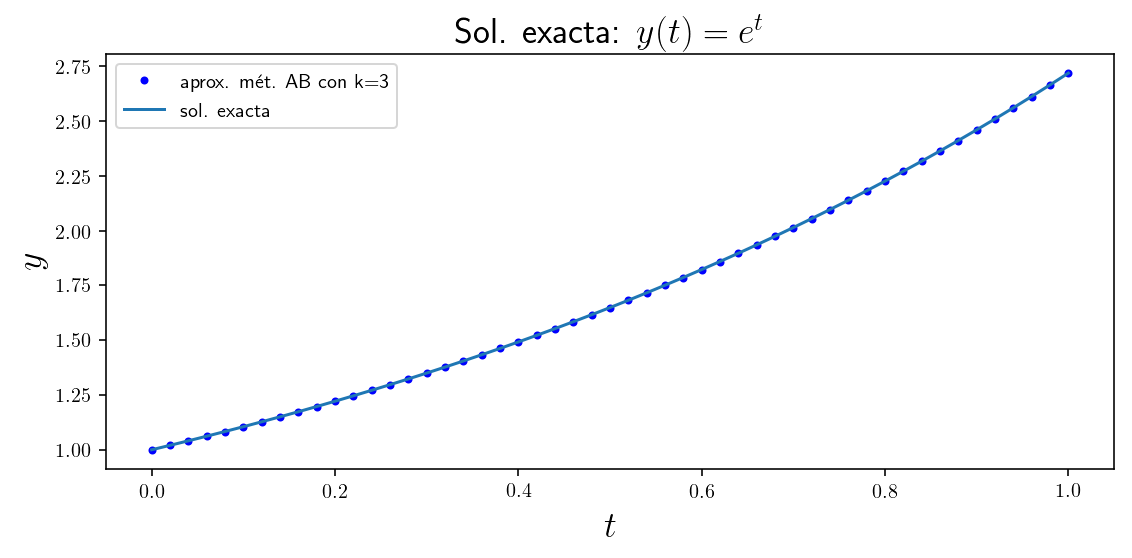

In [366]:
print("Método de Adams-Bashforth con k=3 ")
xx, yAB3 = AB_k3(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - yAB3).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yAB3, 'bo',markersize=3,  label = "aprox. mét. AB con k=3")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Método del trapecio
Error:  9.06163416014572e-5


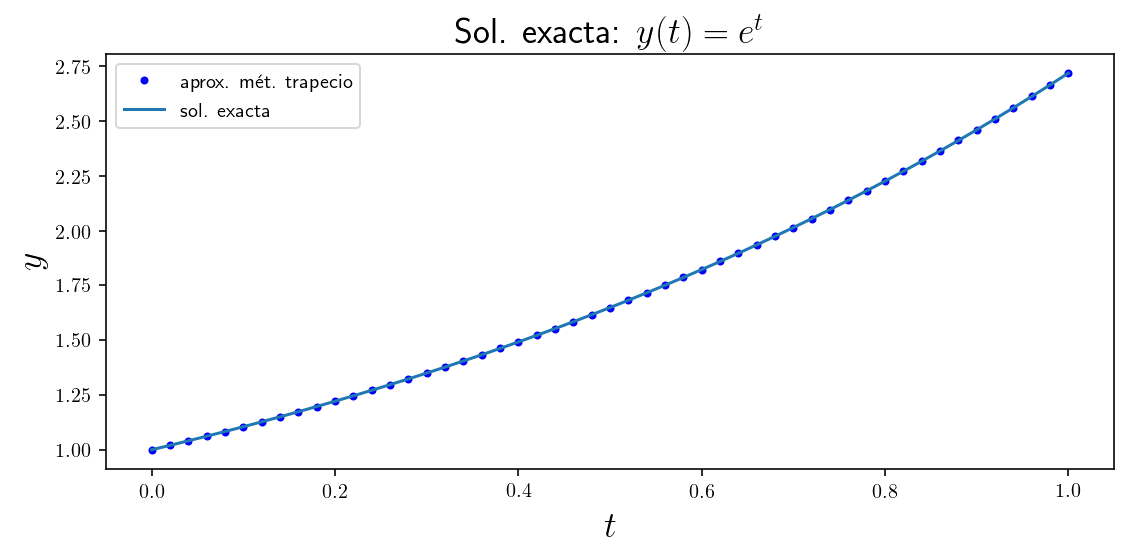

In [367]:
print("Método del trapecio")
xx, ytrap = Trapecio(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - ytrap).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,ytrap,'bo',markersize=3,  label = "aprox. mét. trapecio")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Método de Simpson
Error:  0.000338550084920453


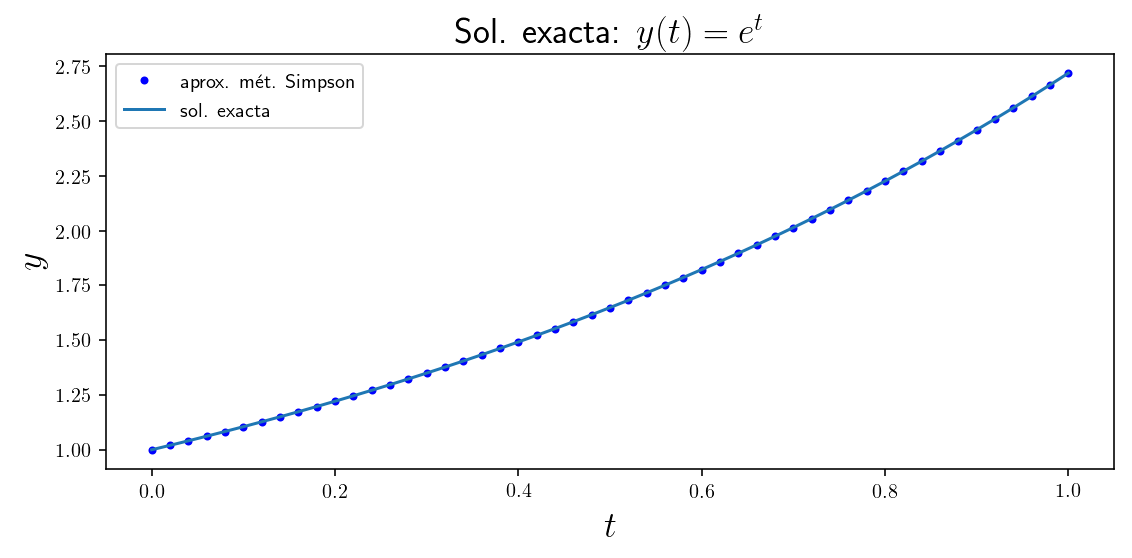

In [368]:
print("Método de Simpson")
xx, ySimp = Simpson(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - ySimp).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,ySimp,'bo',markersize=3,  label = "aprox. mét. Simpson")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

Fórmula abierta de 4 pasos
Error:  0.00107992484043429


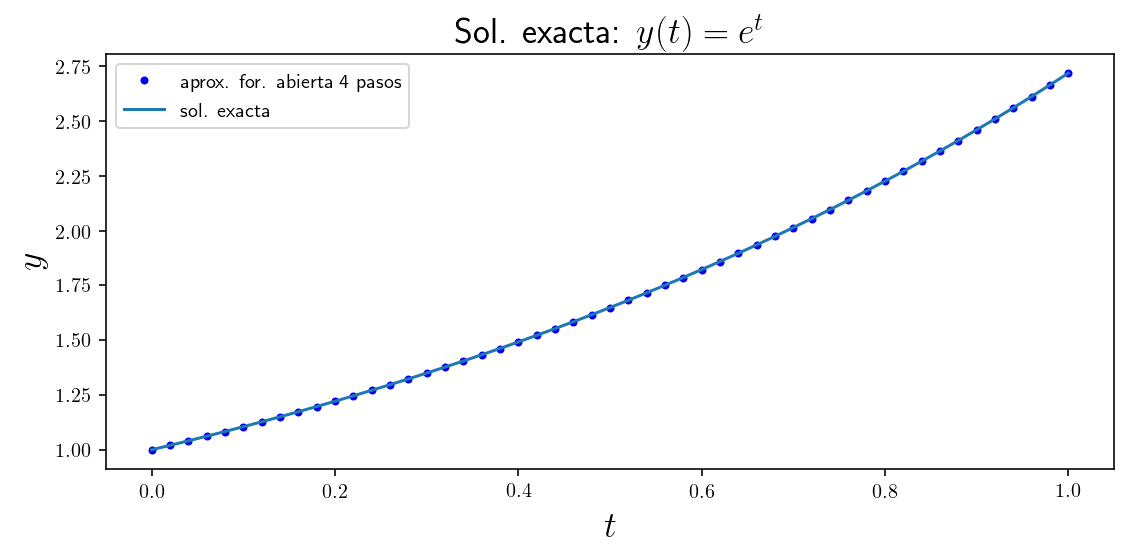

In [369]:
print("Fórmula abierta de 4 pasos")
xx, yabierta = ForAbierta4(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - yabierta).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yabierta,'bo', markersize=3, label = "aprox. for. abierta 4 pasos")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

**Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.**

In [370]:
import numpy as np # Importamos el módulo NumPy con el pseudónimo np
import sympy as sp # Importamos el módulo SymPy con el pseudónimo sp

# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [371]:
t, y0, z = sp.symbols('t, y_0,  z')
a = 0 ; b = 1 
ya = 1 
N=30

def f(t,z):
    return z

In [372]:
def predictorCorrector(F,x0,y0,xfinal,N):
    
    X = np.linspace(x0,xfinal,N+1); h = (xfinal-x0)/N
    Y=[y0]
    
    for n in range(4):
        Y.append(Y[n] + h*F(x0+n*h,Y[n]))
    X = np.linspace(x0,xfinal,N+1)
          
    def predictor(F,x0,y0,y1,y2,y3,y4,h):
        return y4 + h*( 1901*F(x0+4*h,y4) - 2774*F(x0+3*h,y3) + 2616*F(x0+2*h,y2) - 1274*F(x0+h,y1) + 251*F(x0,y0) )/720
    
    def corrector(F,x0,y0,y1,y2,y3,y4,h):
        prediccion = predictor(F,x0,y0,y1,y2,y3,y4,h)
        return y4 + h*(251*F(x0+5*h,prediccion) + 646*F(x0+4*h,y4) - 264*F(x0+3*h,y3) + 106*F(x0+2*h,y2) - 19*F(x0+h,y1) )/720
    
    for n in range(N-4):
        Y.append(corrector(F,X[n],Y[n],Y[n+1],Y[n+2],Y[n+3],Y[n+4],h))
    
    return np.array(X),np.array(Y)


Método Predictor-Corrector:
 [1.         1.03333333 1.06777778 1.10337037 1.14014938 1.17879164
 1.21874908 1.26005797 1.30276784 1.34692531 1.3925795  1.43978114
 1.48858268 1.53903836 1.59120424 1.64513829 1.70090044 1.75855265
 1.818159   1.8797857  1.94350125 2.00937645 2.07748449 2.14790106
 2.22070441 2.29597544 2.37379779 2.45425794 2.53744529 2.62345228
 2.7123745 ]
Error:  0.00590733301610724


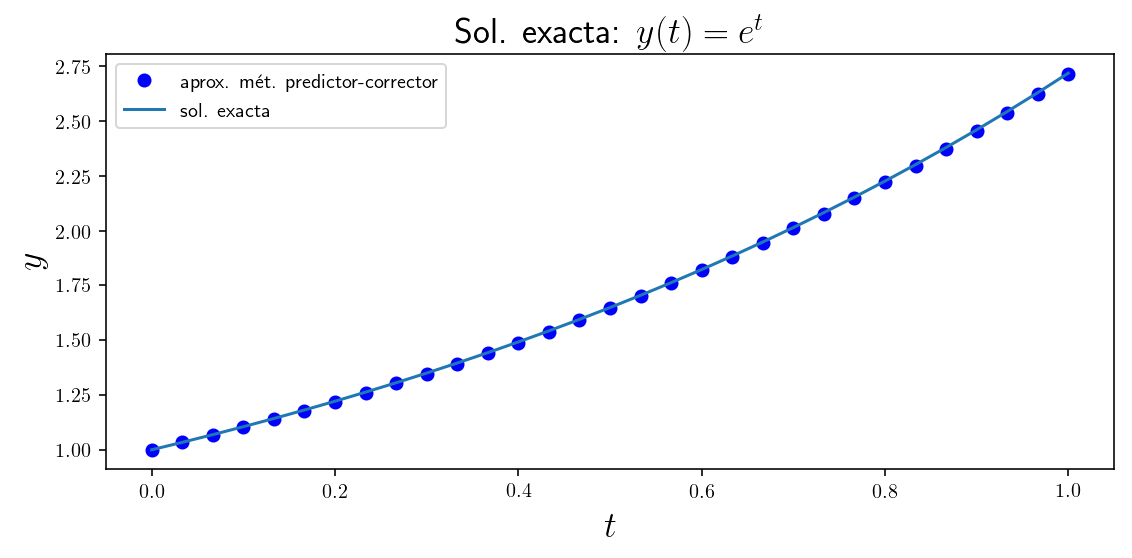

In [373]:
xx, PC = predictorCorrector(f,a,ya,b,N)
print ("Método Predictor-Corrector:\n", PC)

valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print("Error: ", abs(valores_exactos - PC).max())

y_x = sp.lambdify(t, sol_exacta, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,PC, 'bo', label = "aprox. mét. predictor-corrector")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()